In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop('CustomerID',axis=1,inplace= True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
print('Unique values in Gender',df['Gender'].unique())
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

Unique values in Gender ['Male' 'Female']


In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
# default global variables
colors = ['red','green','blue','brown','orange']


In [11]:
def elbow_plot(x):
    #selecting k value for k means clustering
    wcss = []
    for i in range(1,11):
        model = KMeans(n_clusters = i,random_state = 0)
        model.fit(x)
        wcss.append(model.inertia_)
        
    #drawing elbow plot
    plt.plot(range(1,11),wcss)
    plt.xlabel('K-Values  -->')
    plt.ylabel('Error')
    plt.title('Elbow plot')
    plt.show()

In [12]:
def visualize_clusters(model,x,k_pred,k_value):
    
    #plots all the clusters 
    for i in range(k_value):
        #plotting individual cluster one by one
        plt.scatter(x[k_pred==i,0],x[k_pred==i,1],s = 50,c=colors[i])
        
        
    #plotting the centriods 
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100, c = 'black')
    
    #giving labels and title
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Clusters')
    plt.legend(range(k_value))
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


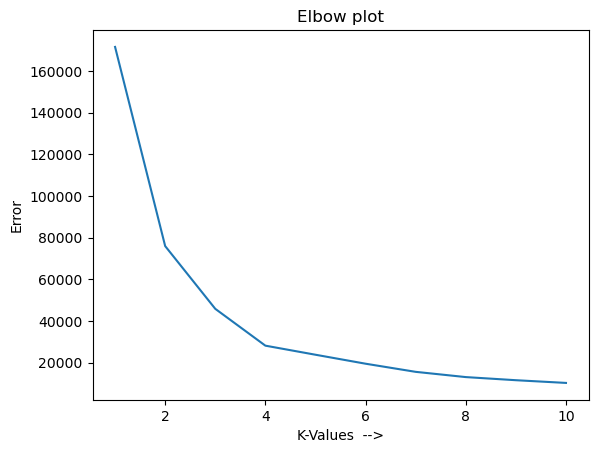

In [13]:
#taking annual income and spending score
x = df.iloc[:,[1,3]].values
#call elbow plot
elbow_plot(x)

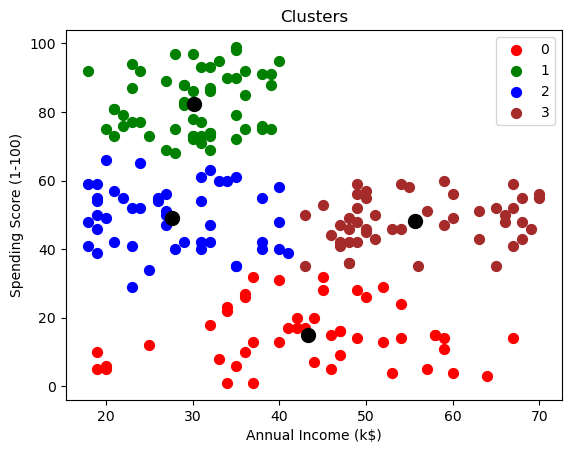

In [16]:
#creating clustering model
k_value = 4
model = KMeans(n_clusters=k_value,random_state=0)
k_pred = model.fit_predict(x)
#print(k_pred)
#function to visualize the clustering
visualize_clusters(model,x,k_pred,k_value)